# BCDP CORDEX Example
## Quick Overview
Here we will do a quick walkthrough of using BCDP to process some regional climate simulations from the Coordinate Regional Downscaling Experiment

In [1]:
import os
import glob
import numpy as np
import bcdp
import matplotlib.pyplot as plt

Create a file conventions template. Here we only need the model and variable names so the rest of the file template is filled in by wildcards.

In [2]:
variable = 'clt'

In [3]:
project = 'CORDEX-Africa'
template = '*_{model}_*_{variable}.nc'
bcdp.build_extractor(project, template, name_field='model', index=[1, 6])

bcdp.extractors.build_extractor_from_params.<locals>.GenericExtractor

Load the data. Because we have loaded the template, the loader now knows exactly how to extract the required informations from the filenames.

In [4]:
paths = f'in/*{variable}*'
ens = bcdp.load_local(paths=paths, project=project)
print(ens.size)

297.91MB


The loader returns an `Ensemble` object, which is essentially a collection of datasets and applies preprocessing operations to each of them. Here we will regrid the data to a coarser (0.88 degree) grid using bilinear interpolation, and consider only the winter months (DJF).

In [5]:
output_grid = bcdp.utils.grid_from_res((0.88, 0.88), ens.overlap)
ens_u = ens.homogenize(backend='scipy', method='linear',
                       output_grid=output_grid, clean=False)

Now that the underlying datastructures are homogeneous (same grid and time step), we can convert it to an xarray dataarray which has dimensions (names, time, lat, lon).

In [6]:
def show_ens(ens):
    da = ens.bundle('CORDEX').add_mean('CORDEX').first
    da.to_netcdf('CORDEX_Africa_clt.nc')
    plt.figure()
    da.mean('time').plot(x='x', y='y', col='names', col_wrap=3)
    plt.savefig(f'cordex_africa_{variable}.png')

We can easily visualize the annual climatology with xarray's built-in plotting methods.

<Figure size 432x288 with 0 Axes>

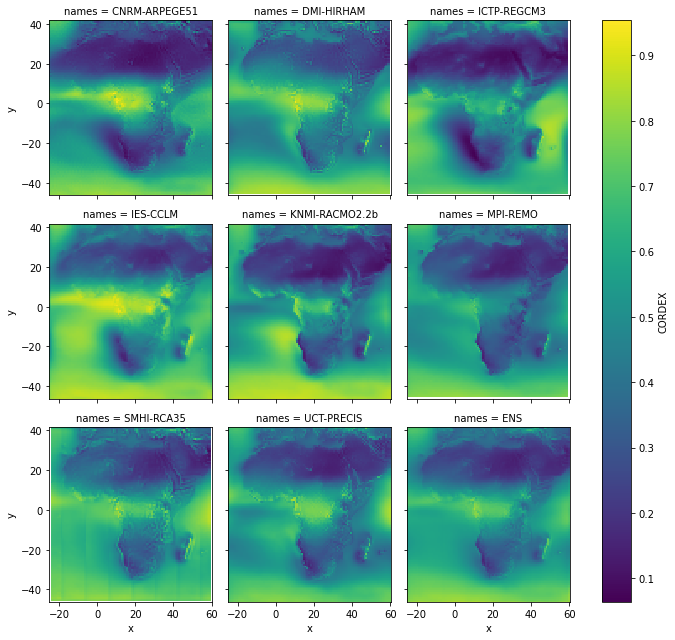

In [7]:
show_ens(ens_u)